# Model Selection Choosing Estimators and Their Parameters
<br>
https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

So you have a model
Separate your data into training and test set
Pass train the model using the training set
Your model makes a prediction compares it to the test set
You can get a score on your prediction
But this is only a score on one data set. Say you have 10 observation, you use observation 1-6 to train and 7-10 to test
You can futher split your data into into different folds to test the model, say 4-10 is train and 1-3 is test
You will get a different score from the first prediction and second prediction
When we slice the data into different folds like this to get the score its call cross validation
Data can be split manually or help with a class, KFold
You can cross validate using KFold that will fold the data in differnt sets and give you multiple scores
There is a helper that will help you with cross validation called cross_val_score
Lastly there is a grid search object to use with an cross validator estimator 
that computes the score during the fit of an estimator 
on a paremter grid 
and picks the parameter to maximize the corss validation score (so cross validation on steriods)

At the end of the day we are running test to to put through the model to get the highest score

## Score, and cross-validated scores

Every estimator has a score that gauges how accurate the fit on the new data. Here, bigger is better.

The estimator we choose will be from the SVM support vector machine class. Our option for estimator will be
either SVC for classification or SVR for regression. For this exercise we will be mostly working with the classification estimator, SVC and its different kernals.

In [8]:
from sklearn import datasets, svm #import dataset package and svm module (classification estimator)
#SVM is the support vector machine, its vetcor help identify or reduce the margin between classes
X_digits, y_digits = datasets.load_digits(return_X_y=True) #returns data as (data,target) array instead of bunch, X data, y target
#when you call the dataset, it returns it for easy loading in the X_digits, y_digits setup you have
svc = svm.SVC(C=1, kernel='linear') #from svm calls the svc module, support vector classification.
#setup the svc parameter using the linear kernal, and C =1
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:]) #use the svc module we imported to variable svc
#fit all but the last 100 data in the X_digits variable, to all but the last 100 target data in y_digits
#return the score (a method) or how accurate the test data is to the label 
#score returns the mean accuracy on the given test data and labels

numpy.ndarray

## Kfold cross-validation

To get a better understanding of the predicted accuray (goodness of fit), we can split the data into 'fold' for the training and testing

In [41]:
import numpy as np
X_folds = np.array_split(X_digits, 3) #X_digits,y_digits is 1797 vector of image array
y_folds = np.array_split(y_digits, 3) #split into 3 even array
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds) #set X_train as list of X_folds which was an array to a list of 3 array wiith 599 image vector
    X_test = X_train.pop(k) #we pop the first element of the X_train, leaving 2 array in the list, this will be our test set
    X_train = np.concatenate(X_train) #this converts X_train back to array so we can pass to the fit method, it is now 1198 image vector instead of array 1 and 2
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train,y_train).score(X_test,y_test)) #we use the svc object we called above to fit each fold of the data
print(scores)                                            

599
599
599
[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


Here we see the KFold cross validation is taking each of the 3 set of the digits data and fitting them to the 3 set of our target data. Essentially splitting the data into equal parts and score the model fit to each parts

So the loop will:
fit array 1 and 2, get a score, append to score list
fit array 0 and 2, get a score, append to score list
fit array 0 and 1, get a score, append to score list

1) Set X_train as list of X_folds, list for poping
2) Set X_test as a list of array, 1 and 2, we popped element 0 
3) Convert X_train to arrary in stead of list of array through concatenate
Now for the y/target data
4) Set y_train as list of y_folds, list for poping
5) Set y_test as a list of array, 1 and 2, we popped element 0 
6) Convert y_train to arrary again through concatenate
Finally we fit the data to the linear model using svc we created earlier and run the score method appending it to score list.

We can also use Kfold method in sklearn.model_selection
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

## Cross-validation generators
Scikit-lean has a collection of classes that can generate list of train/test indices for different cross-validation strategies. Basically the classes available by Scikit-learn and split the data for you in like we did above using the numpy array_split.

These classes use a split method (a function inside a class) which will take the input dataset and split it, returning train/test set indicies for each iteration of the desired cross-validation strategy.

So you have a model
Separate your data into training and test set
Pass train the model using the training set
Your model makes a prediction compares it to the test set
You can get a score on your prediction
But this is only a score on one data set. Say you have 10 observation, you use observation 1-6 to train and 7-10 to test
You can futher split your data into into different folds to test the model, say 4-10 is train and 1-3 is test
You will get a different score from the first prediction and second prediction
When we slice the data into different folds like this to get the score its call cross validation
Data can be split manually or help with a class, KFold
You can cross validate using KFold that will fold the data in differnt sets and give you multiple scores
There is a helper that will help you with cross validation called cross_val_score
Lastly there is a grid search object to use with an cross validator estimator 
that computes the score during the fit of an estimator 
on a paremter grid 
and picks the parameter to maximize the corss validation score (so cross validation on steriods)

At the end of the day we are running test to to put through the model to get the highest score

In [62]:
from sklearn.model_selection import KFold, cross_val_score # import the cross-validation we want to use, here its Kfold
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5) #sets the folds to 5
for train_indicies, test_indicies in k_fold.split(X): #k_fold.split(X) splits the list into train and test
    print('Train: %s | test: %s' % (train_indicies, test_indicies))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


We start with our list of 10 items
Create the object k_fold, using the KFold and split the data into 5 folds
The 5 folds will be used as the training set
The test set will use two items to check for accuaracy. Why two for the test set, because we are splitting into equal parts, so 5 equal parts divided by 10 items is 2. So if i had 15 items in a list, with a 5 split, the test set would have 3 items (15/5). 

In [65]:
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c","e","e","e","e","e"]
k_fold = KFold(n_splits=5) #sets the folds to 5
for train_indicies, test_indicies in k_fold.split(X): #k_fold.split(X) splits the list into train and test
    print('Train: %s | test: %s' % (train_indicies, test_indicies))


Train: [ 3  4  5  6  7  8  9 10 11 12 13 14] | test: [0 1 2]
Train: [ 0  1  2  6  7  8  9 10 11 12 13 14] | test: [3 4 5]
Train: [ 0  1  2  3  4  5  9 10 11 12 13 14] | test: [6 7 8]
Train: [ 0  1  2  3  4  5  6  7  8 12 13 14] | test: [ 9 10 11]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11] | test: [12 13 14]


Likewise if we had 16 items split 4 folds, 16/4 = 4. So 4 in the test set, the remaing in the training set

In [66]:
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c","e","e","e","e","e","f"]
k_fold = KFold(n_splits=4) #sets the folds to 5
for train_indicies, test_indicies in k_fold.split(X): #k_fold.split(X) splits the list into train and test
    print('Train: %s | test: %s' % (train_indicies, test_indicies))

Train: [ 4  5  6  7  8  9 10 11 12 13 14 15] | test: [0 1 2 3]
Train: [ 0  1  2  3  8  9 10 11 12 13 14 15] | test: [4 5 6 7]
Train: [ 0  1  2  3  4  5  6  7 12 13 14 15] | test: [ 8  9 10 11]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11] | test: [12 13 14 15]


### Applying Cross-Validation method

In [75]:
#The digits data set has 1797 image that we imported as a matrix array, X_digits and y_digits
#We can examin how the folds are split
print(len(X_digits))
print(len(y_digits))

#If we fold the data into 5 folds, then we should have 360 in the test set and 1437 in the train set
#test set=1797/5 = 359.4 or 360
#train set=1797-360 = 1437
#Below we see that there are 5 folds and each fold is comprised of ~1437 training set and ~360 test set, *note rounding

k_fold = KFold(n_splits=5) #sets the folds to 5
for train_indicies, test_indicies in k_fold.split(X_digits): #k_fold.split(X) splits the list into train and test
    print('Train: %s | test: %s' % (len(train_indicies), len(test_indicies)))
    #print('Train: %s | test: %s' % (train_indicies, test_indicies))

1797
1797
Train: 1437 | test: 360
Train: 1437 | test: 360
Train: 1438 | test: 359
Train: 1438 | test: 359
Train: 1438 | test: 359


In [77]:
k_fold = KFold(n_splits=5) #sets the folds to 5
for train_indicies, test_indicies in k_fold.split(X_digits): #k_fold.split(X) splits the list into train and test
    print('Train: %s | test: %s' % (train_indicies, test_indicies))
    
#From the below we how the fold incidies are divided:
#Fold #1: Traing:(360-1796) | Test-(0-359)
#Fold #2: Traing:(0-359, 720-1796) | Test-(360-719)
#Fold #3: Traing:(0-719, 1079-1796) | Test-(720-1078)
#Fold #4: TTraing:(0-1078, 1438-1796) | Test-(1079-1437)
#Fold #5: Traing:(0-1437) | Test-(1438-1796)

Train: [ 360  361  362 ... 1794 1795 1796] | test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


In [78]:
#Using list comprehension we can fit the digits data and score it using kfold method
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

#Apply the svc object and fit method, to use X_digits in range train as the train set, and y_digits in range train as test set,
#using the score method to get score, or how  accurate the pection was, higher is better. In each fold, model performed over 90% with its prediction

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

Instead of svc object to get the score of the Kfold, to get the cross-validation score, lets use cross_val_score helper. We will need to supply the help with the following:

1) Estimator - (SVM (support vector machine)->SVC(support vector classification))
2) Cross Validation Object - imported from sklearn.model_selection above
3) Input data set X_digits and y_digits

cross_val_score will split the data into training and testing sets, to train the estimator using the data supplied and compute the scores based on the testing set for each iteration of the cross-validation

In [80]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

#-1 means use all CPU on computer

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

In [81]:
#We can pass a scoreing argument to apply different scoring method
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

There are other Cross-validation generator we can use as well, KFolds, StratificationKFold, GroupKFold, ect

# Exercise 1

On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

Lets break this down:

On the digits dataset<br>
X_digits, y_digits = datasets.load_digits(return_X_y=True)

plot the cross-validation score<br>
cross_val_score method from sklearn.model_selection
cross_val_score(estimator, X, y=None, cv=None, n_jobs=None)

of a SVC estimator with an linear kernel<br>
svc = svm.SVC(C=1, kernel='linear')

as a function of parameter C<br>
(use a logarithmic grid of points, from 1 to 10)

Its asking use to use the output from the logarithmic grid, as value C in the SVC. C here is the regularization prameter or how much we allow the model to overfit. This regularize or shrinking of the coefficient to zero. This helps the model avoid learning complex methods to avoid overfitting. Overfitting will have a low cross validation score as it will fit a few predictions well.

#### This is the code that was given

In [86]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10) #returns a number space evenly on a log scale, to graph a classification model
scores = list()
C_s

array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00])

So we have our,<br>
1) Dataset<br>
2) Our estimator, SVC, classification<br>
3) and our logarithmic grid. This is what we will pass as C, regularization parmeter. The higher the C_s, the higher the cross validation score

So all we need to do is, get the cross validation score for each of the C_s values (regularization parameter). Create a loop, to replace C in svc = svm.SVC(C=1,kernel='linear'). To make things easier, apprently we can assign ti this way, svc.C. This will tell the svc method to use the value we assing to C to the regularization parameter

In [96]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10) #returns a number space evenly on a log scale, to graph a classification model

scores = list()

#----Add Code
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    
print(f'C_s: {C_s}')
print(f'CV scores: {scores}')

C_s: [1.00000000e-10 1.29154967e-09 1.66810054e-08 2.15443469e-07
 2.78255940e-06 3.59381366e-05 4.64158883e-04 5.99484250e-03
 7.74263683e-02 1.00000000e+00]
CV scores: [0.15754874651810585, 0.15754874651810585, 0.15754874651810585, 0.15754874651810585, 0.15754874651810585, 0.9065273909006499, 0.94937944908697, 0.949374806561436, 0.9476973073351903, 0.9476973073351903]


Here we see the higher the C_s value the higher the cross validation score, lower possibility of overfitting and lower the coefficient estimate to zero.

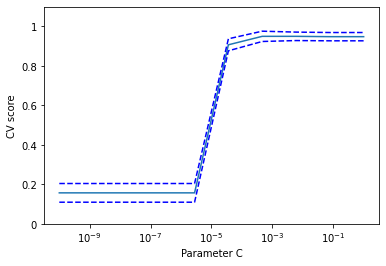

In [97]:
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

# Grid-search and cross-validated estimators

scikit-learn also has a grid serach object. This object used inconjunction with a cross validator estimator computes the score during the fit of an estimator on a paremter grid and picks the parameter to maximize the corss validation score. "This object takes an estimator during the construction and exposes an estimator API:"

class sklearn.model_selection.GridSearchCV(estimator, param_grid, n_jobs=None)

In [102]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])        
print(f'clf best score is {clf.best_score_}')
print(f'clf best estimator is {clf.best_estimator_.C}')

# Prediction performance on test set is not as good as on train set. Training set is from data set [:1000] (above)and
#test set is from [1000:] (below)
clf.score(X_digits[1000:], y_digits[1000:])   

#So above score from the training set (0.95), is better than the test score from the bottom (0.9460), only slightly


clf best score is 0.95
clf best estimator is 0.0021544346900318843


0.946047678795483

### Cross-validated estimators
"Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, scikit-learn exposes Cross-validation: evaluating estimator performance estimators that set their parameter automatically by cross-validation:"


In [ ]:
>>> from sklearn import linear_model, datasets
>>> lasso = linear_model.LassoCV()
>>> X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
>>> lasso.fit(X_diabetes, y_diabetes)
LassoCV()
>>> # The estimator chose automatically its lambda:
>>> lasso.alpha_
0.00375...

Not sure whats going on here. Its saying that cross validation can be done more efficiently on an algorithm by algorithm basis. Some estimator automatically set their parameters by cross validation, meaning they set their own cross validation parameters?

The above code uses the lasso model and says the labmda is automatically chosen, but looks at the alph. Are we saying that because the alpha is so small that the lambda is automatically chosen?

Alpha is a parameter for regulariztion term, aka penalty term, that combats overfitting by constraining the sze of the wieghts. Increasin alpha may fix high variances (signe of over fitting), since overfitting tends to work well with specific data, using it with othe data will create a lot of variances. It does this by encouraging smaller weights, resulting in a decision bourndy plat that appars with lesser curvatures.

## Exercise #2
On the diabetes dataset, find the optimal regularization parameter alpha.

Bonus: How much can you trust the selection of alpha?

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]


Remember that regularization is how well we let the model over fit and the alpha in the model drives that.

From the above what do we have:

1) Iris data set
2) LassoCV, linearn model, where alph is already choosen and is searching over them. This also has its own folds defined (https://www.reddit.com/r/learnmachinelearning/comments/f8bvj2/difference_between_using_lassocv_and_lasso_with/)
3) Lasso, basic linear Lasso model
4) Kfolds, class that helps cut up the data
5) GridsearchCV model 

Baiscally asking us, for the LassoCV, Lasso and GridsearchCB, what is the regularization paratmeter alpha (what is alpha for each of the two models). Higher alpha suggest more overfitting. 

Bonus question is asking how much can you trust the alpha. If the scores are the same and the alphs are the different, then for each model we are adjusting alph too much and are overfitting, its just tweeking alpha to get better scores.

[0.39638051 0.39650624 0.39667201 0.39689044 0.39717807 0.39755659
 0.39805404 0.39870708 0.3995624  0.40067986 0.40213502 0.40402065
 0.40596304 0.40831427 0.41123993 0.41489967 0.41926122 0.42107802
 0.42225458 0.42355432 0.42500251 0.42670708 0.42957468 0.43220641
 0.43298992 0.43133725 0.42655766 0.41766182 0.4017079  0.3759415 ]
[0.11863791 0.11859772 0.11854485 0.11847532 0.11838402 0.11826431
 0.11810778 0.11790362 0.11763848 0.1172957  0.11685546 0.11629513
 0.11546887 0.11437268 0.11298326 0.11130078 0.10948023 0.10804293
 0.10623482 0.10406598 0.10140435 0.09800434 0.09373244 0.08903846
 0.08378286 0.07585547 0.06699804 0.05613088 0.04655695 0.04982195]


(0.0001, 0.31622776601683794)

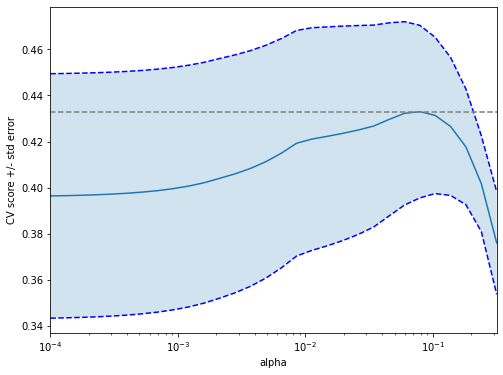

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

#----The above is given with the exception of y. X[:150] will be the training set and y[:150] will be the test set

#---Next we create a lasso obeject with the Lasso model.
#Using the Lasso model, set the random state see to 0 and use 10,000 iteration
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30) #return numbers evenly space on log scale, start, stop, number of pieces to separate

tuned_parameters = [{'alpha': alphas}] #creates a dictionary array of the above alpha
n_folds = 5 #sets the number of folds

#---Cross validort that takes an estimator and obtains a score
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
clf.fit(X,y)
scores = clf.cv_results_['mean_test_score'] #find the mean of the 30 log scale we made earlier
print(scores)
scores_std = clf.cv_results_['std_test_score']
print(scores_std)
plt.figure().set_size_inches(8, 6) #creates an empty figure of 8,6 size
plt.semilogx(alphas, scores) #makes a plot with log scale on the x axis. This is the solid blue line below

# plot error lines showing +/- std. errors of the scores
#standard error tells you how accurate the mean of any sample is, in relation to the population mean
#that is if you were taking samples from a population, how close is that mean for the sample is to the population
#higher std, higher std error, more samples less the std error
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--') #take the mean score and add the std_error to each of them
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])


In [6]:
# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000) 
k_fold = KFold(3) #3 folds

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)): #enumerate returns count and the value
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test]))) #f string returns the count (k), the alpha, and the score
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

KFold(n_splits=3, random_state=None, shuffle=False)
Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


From the above results of the cross validation, we see that there were 3 folds and that the alph are different, so that the model adjust the alpha to get the best fit, and even then the difference in the score are somewhat wide.